## Get Data and Unpack

In [1]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Gets data, assumes data is in data folder placed one level up
higgs = pd.read_pickle(r"../data/higgs_100000_pt_1000_1200.pkl")
qcd = pd.read_pickle(r"../data/qcd_100000_pt_1000_1200.pkl")

In [3]:
print("Array of column names for higgs are " + str(higgs.keys()))
print("Array of column names for qcd are " + str(qcd.keys()))
print("Shape of higgs data is: " + str(np.shape(higgs)))
print("Shape of qcd data is: " + str(np.shape(qcd)))
print("Sample of of higgs data is: \n" + str(higgs[0:3]))
print("\nSample of of qcd data is: \n" + str(qcd[0:3]))

Array of column names for higgs are Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Array of column names for qcd are Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Shape of higgs data is: (100000, 14)
Shape of qcd data is: (100000, 14)
Sample of of higgs data is: 
            pt       eta       phi        mass       ee2       ee3        d2  \
0  1130.533498  0.075569 -2.535979  126.390705  0.050194  0.000198  1.565921   
1  1040.287356 -0.917809 -0.511002  125.735472  0.068068  0.000259  0.822408   
2  1042.978241  0.431547 -1.287136  125.946948  0.054627  0.000189  1.159519   

   angularity        t1        t2        t3       t21       t32  KtDeltaR  
0    0.000846  0.710011  0.318588  0.201156  0.448709  0.631396  0.236212  
1    0.000093  1.070693  0.243505  0.149150  0.227427  0.612512  0.223

## Data Features of each column

In [4]:
labels = ["pt","eta","phi","mass","ee2","ee3","d2","angularity","t1","t2","t3","t21","t32","KtDeltaR"]
for i in labels:
    print("For the " + i + " value")
    print("QCD mean of: " + str(np.mean(qcd[i])) + " and standard deviation of: " + str(np.std(qcd[i])))
    print("Higgs mean of: " + str(np.mean(higgs[i])) + " and standard deviation of: " + str(np.std(higgs[i])))
    print("")

For the pt value
QCD mean of: 1099.0690779191987 and standard deviation of: 52.703330657647555
Higgs mean of: 1102.5019962312756 and standard deviation of: 45.837758672911825

For the eta value
QCD mean of: 5.9325698964681786e-05 and standard deviation of: 0.8246723802722319
Higgs mean of: -1.7033406868031028e-05 and standard deviation of: 0.5496049655367876

For the phi value
QCD mean of: -0.004368991265266195 and standard deviation of: 1.813303187329249
Higgs mean of: -0.0026990189419765546 and standard deviation of: 1.8172329617649297

For the mass value
QCD mean of: 177.2731314354495 and standard deviation of: 99.97182194341833
Higgs mean of: 126.66383222477353 and standard deviation of: 8.407948104697551

For the ee2 value
QCD mean of: 0.060812779336283845 and standard deviation of: 0.056125089334912705
Higgs mean of: 0.05229876850491302 and standard deviation of: 0.0118556232968369

For the ee3 value
QCD mean of: 0.0015903901144824378 and standard deviation of: 0.0037172808996778

## Data Feature Analysis
The Higgs signal data can't be reliably distinguished from the QCD background most of the time. The Higgs signal data makes up a small portion that is within one or two standard deviations of the QCD data in most categories, making it difficult to differentiate from the background QCD data with any high degree of certainty.
## Histograms of Distributions

In [5]:
def plot_histogram(val1):
    fig, ((ax1), (ax2)) = plt.subplots(1, 2)
    ax1.hist(qcd[val1])
    ax1.set_title("QCD")
    ax1.set_xlabel(val1)
    ax1.set_ylabel("Count")
    ax2.hist(higgs[val1])
    ax2.set_title("Higgs")
    ax2.set_xlabel(val1)
    ax2.set_ylabel("Count")
    plt.show()

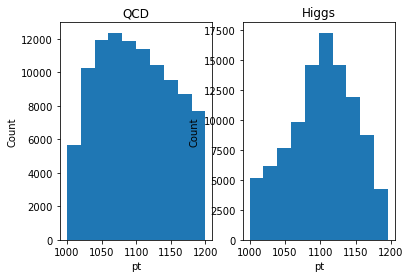

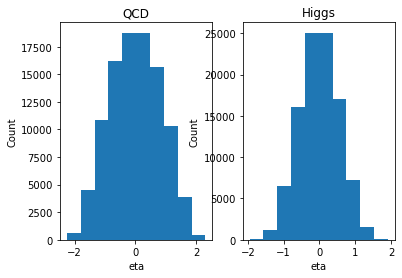

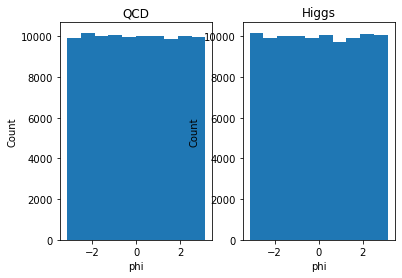

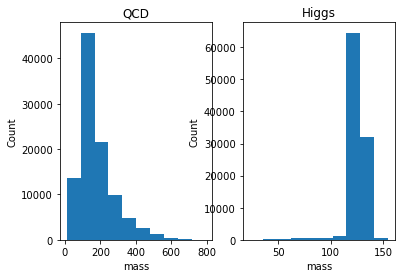

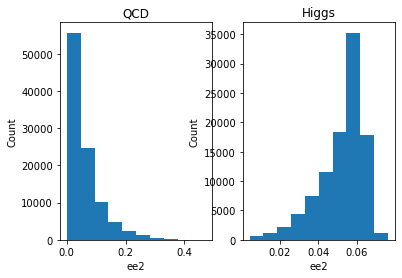

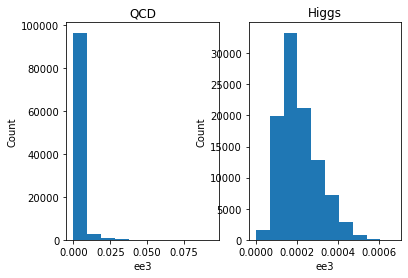

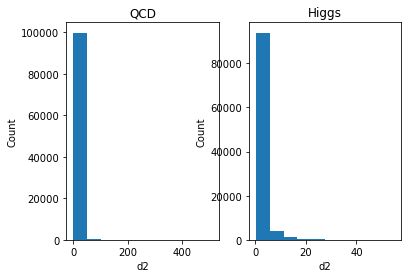

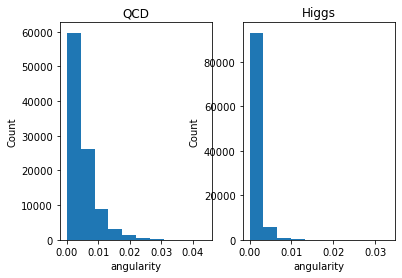

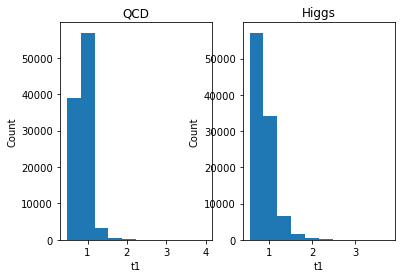

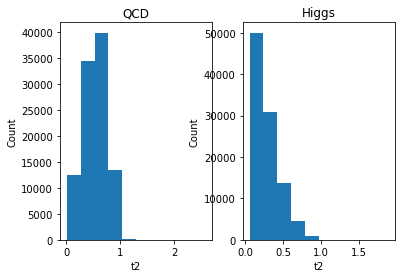

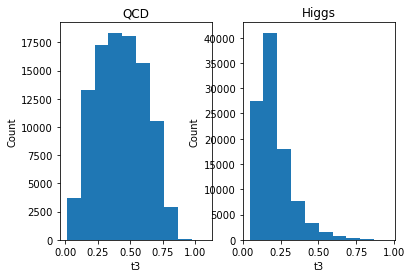

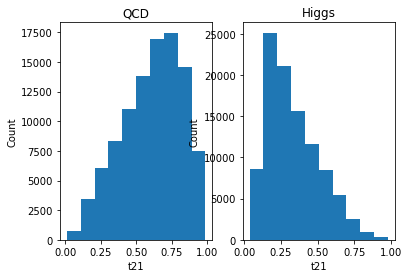

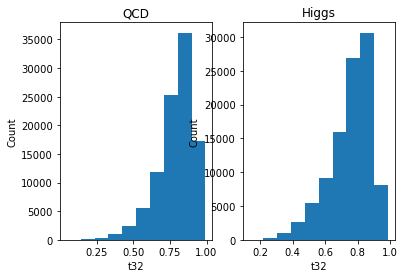

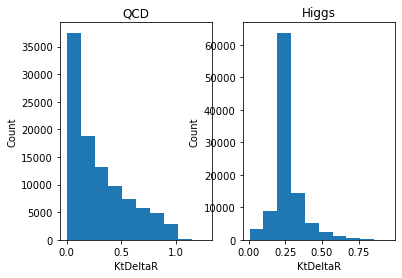

In [6]:
for i in labels:
    plot_histogram(i)

## Histogram Analysis
The Higgs signal distributions are often clustered much more closely around a smaller area than the QCD distributions (such as in the mass, ee2, t3, and KtDeltaR distributions) , which makes sense as the Higgs signal data is from a specific signal while the QCD background is basically everything else going on. Additionally, the t3 and t21 distributions are differently shaped over the same range in both data sets, making them potentially interesting for differentiation purposes.
## Correlation Finding

In [7]:
# Print correlation if above a certain threshold
labels = ["pt","eta","phi","mass","ee2","ee3","d2","angularity","t1","t2","t3","t21","t32","KtDeltaR"]
threshold = 0.7

for i in labels:
    print("New first variable of: " + i)
    for j in labels:
        if (abs(np.corrcoef(qcd[i],qcd[j])[0,1]) > threshold or abs(np.corrcoef(higgs[i],higgs[j])[0,1]) > threshold) and i != j:
            print("QCD correlation between " + i + " and " + j + " is: " + str(np.corrcoef(qcd[i],qcd[j])[0,1]))
            print("Higgs correlation between " + i + " and " + j + " is: " + str(np.corrcoef(higgs[i],higgs[j])[0,1]))

New first variable of: pt
New first variable of: eta
New first variable of: phi
New first variable of: mass
QCD correlation between mass and ee2 is: 0.959964550563476
Higgs correlation between mass and ee2 is: 0.48211753230244625
QCD correlation between mass and ee3 is: 0.7939910676941662
Higgs correlation between mass and ee3 is: 0.2956227882726568
QCD correlation between mass and KtDeltaR is: 0.7083562993788185
Higgs correlation between mass and KtDeltaR is: 0.20763653608246413
New first variable of: ee2
QCD correlation between ee2 and mass is: 0.9599645505634761
Higgs correlation between ee2 and mass is: 0.4821175323024462
QCD correlation between ee2 and ee3 is: 0.8446985052092234
Higgs correlation between ee2 and ee3 is: 0.47258650118841916
QCD correlation between ee2 and d2 is: -0.5674452783602613
Higgs correlation between ee2 and d2 is: -0.7627073848844331
New first variable of: ee3
QCD correlation between ee3 and mass is: 0.7939910676941662
Higgs correlation between ee3 and mass

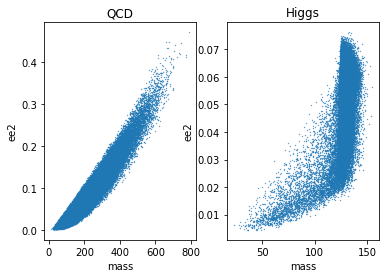

In [8]:
fig, ((ax1), (ax2)) = plt.subplots(1, 2)
val1 = "mass"
val2 = "ee2"
ax1.scatter(qcd[val1],qcd[val2],s=0.1)
ax1.set_title("QCD")
ax1.set_xlabel(val1)
ax1.set_ylabel(val2)
ax2.scatter(higgs[val1],higgs[val2],s=0.1)
ax2.set_title("Higgs")
ax2.set_xlabel(val1)
ax2.set_ylabel(val2)
plt.show()

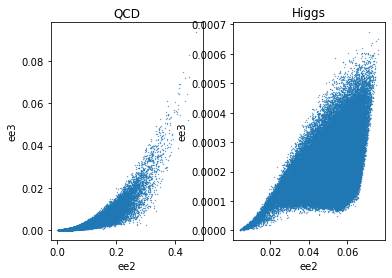

In [9]:
fig, ((ax1), (ax2)) = plt.subplots(1, 2)
val1 = "ee2"
val2 = "ee3"
ax1.scatter(qcd[val1],qcd[val2],s=0.1)
ax1.set_title("QCD")
ax1.set_xlabel(val1)
ax1.set_ylabel(val2)
ax2.scatter(higgs[val1],higgs[val2],s=0.1)
ax2.set_title("Higgs")
ax2.set_xlabel(val1)
ax2.set_ylabel(val2)
plt.show()

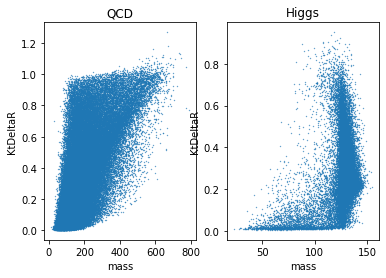

In [10]:
fig, ((ax1), (ax2)) = plt.subplots(1, 2)
val1 = "mass"
val2 = "KtDeltaR"
ax1.scatter(qcd[val1],qcd[val2],s=0.1)
ax1.set_title("QCD")
ax1.set_xlabel(val1)
ax1.set_ylabel(val2)
ax2.scatter(higgs[val1],higgs[val2],s=0.1)
ax2.set_title("Higgs")
ax2.set_xlabel(val1)
ax2.set_ylabel(val2)
plt.show()

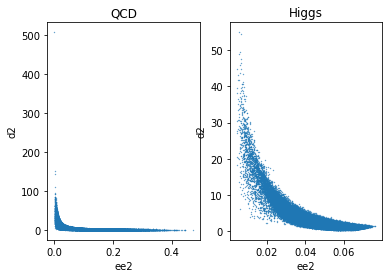

In [11]:
fig, ((ax1), (ax2)) = plt.subplots(1, 2)
val1 = "ee2"
val2 = "d2"
ax1.scatter(qcd[val1],qcd[val2],s=0.1)
ax1.set_title("QCD")
ax1.set_xlabel(val1)
ax1.set_ylabel(val2)
ax2.scatter(higgs[val1],higgs[val2],s=0.1)
ax2.set_title("Higgs")
ax2.set_xlabel(val1)
ax2.set_ylabel(val2)
plt.show()

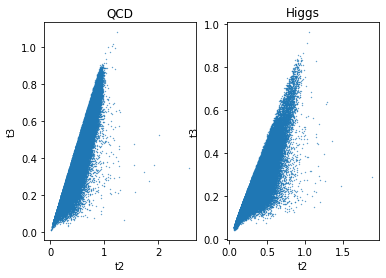

In [12]:
fig, ((ax1), (ax2)) = plt.subplots(1, 2)
val1 = "t2"
val2 = "t3"
ax1.scatter(qcd[val1],qcd[val2],s=0.1)
ax1.set_title("QCD")
ax1.set_xlabel(val1)
ax1.set_ylabel(val2)
ax2.scatter(higgs[val1],higgs[val2],s=0.1)
ax2.set_title("Higgs")
ax2.set_xlabel(val1)
ax2.set_ylabel(val2)
plt.show()

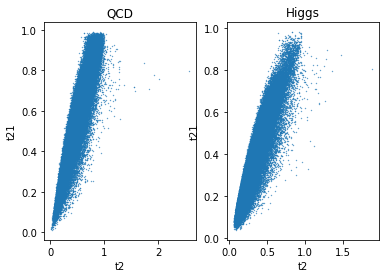

In [13]:
fig, ((ax1), (ax2)) = plt.subplots(1, 2)
val1 = "t2"
val2 = "t21"
ax1.scatter(qcd[val1],qcd[val2],s=0.1)
ax1.set_title("QCD")
ax1.set_xlabel(val1)
ax1.set_ylabel(val2)
ax2.scatter(higgs[val1],higgs[val2],s=0.1)
ax2.set_title("Higgs")
ax2.set_xlabel(val1)
ax2.set_ylabel(val2)
plt.show()

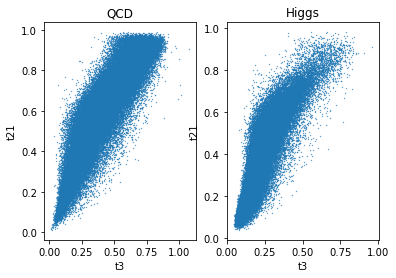

In [14]:
fig, ((ax1), (ax2)) = plt.subplots(1, 2)
val1 = "t3"
val2 = "t21"
ax1.scatter(qcd[val1],qcd[val2],s=0.1)
ax1.set_title("QCD")
ax1.set_xlabel(val1)
ax1.set_ylabel(val2)
ax2.scatter(higgs[val1],higgs[val2],s=0.1)
ax2.set_title("Higgs")
ax2.set_xlabel(val1)
ax2.set_ylabel(val2)
plt.show()

## Correlation Analysis
There is a strong positive correlation between mass and ee2, mass and ee3, mass and KDeltaR, as well as ee2 and ee3 in the QCD data but not the Higgs data. Interestingly, the Higgs data has a seemingly bent relationship between mass and ee2, although not to the extent that the QCD has a strong positive correlation between them. t2, t3, and t21 all showed strong positive correlations with each other in both the QCD data and the Higgs data, which isn't particularly helpful for distinguishing the two data sets from each other. Finally, the Higgs data showed a strong negative correlation between ee2 and d2, although the QCD data had a decently strong negative correlation as well, which makes the correlations unhelpful for distinguishing the two data sets.
## Conclusion
To best be able to identify the signal from the background, we should focus on the areas where the two data sets most diverge and combine them to increase the sensitivity.